In [2]:
# import external packages
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

# Spike Time Analysis with Numpy and Matplotlib


In the experiment reported by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mice perform a discrimination task where they move the position of a stimulus using a steering wheel. During the experiment, electrophysiology recordings are made of different brain areas. The recordings are made with a dense array of probes called NeuroPixels, a schmetic of which is shown below.

<img src="neuropixels.png" alt="drawing" width="300"/>



##### Analysis Goals
In this notebook we will visualize spiking events, examine their relationship with key experimental variables, and compare activity patterns across distinct brain regions.
##### Learning Goals
We will learn to use the [**NumPy**](https://numpy.org/) Python module to carry out numerical operations and plot results with the [**matplotlib**](https://matplotlib.org/)  plotting library.

---

### Practice with Pandas: Extracting information from a DataFrame

Each spike is characterised by 4 pieces of information:
* The identifier for that spike
* The trial in which the spike occurred
* The cell in which the spike occurred
* The time during the trial when the spike occurred

**Useful Code**


- **Pandas**
    - `df[df['column_B'] == 42]`: filter a DataFrame where the values of `column_B` are 42.
    - `df['column_A'].nunique()`: count the number of unqiue values in `column_A` of a DataFrame
    - `df.groupby('column_B')['column_A'].nunique()` : group a dataframe according to values of `column_B` and count the number of unique values in `column_A`
    - `df.max()`: find the maxium value of a DataFrame
    - `df.idxmax()`: find the index where the maximum value occurs in a DataFrame
    - 
   
- **matplotlib**
    - `plt.hist(data_values)`: plot a histogram of `data_values`
    - `plt.`



In [3]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/3Uf2gScrvuTPQhB', 'data/steinmetz_2017-01-08_Muller.nc')

Create a `dataset` with `xr.load_dataset`

In [3]:
dataset = xr.load_dataset("data/steinmetz_2017-01-08_Muller.nc")
dataset

<xarray.Dataset>
Dimensions:             (trial: 261, time: 250, cell: 1268,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 256 257 258 259 260 261
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 50 0 100 0 50 0 0 ... 0 100 0 100 0 100 0
    contrast_right      (trial) int8 0 50 25 100 50 50 ... 50 100 50 100 25 25
    gocue               (trial) float64 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.104 1.402 1.053 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -27.6 ... 0.1221
    spike_time          (spike_id) float32 2.363 2.385 1.451 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1268 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 1 1 2 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

Make a DataFrame with spiking data

In [4]:
cols = ["spike_trial", "spike_cell", "spike_time"]
df = dataset[cols].to_dataframe().reset_index()
df

,spike_id,spike_trial,spike_cell,spike_time
0,1,1,1,2.362881
1,2,1,1,2.384915
2,3,2,1,1.450718
3,4,2,1,1.459585
4,5,2,1,1.963452
...,...,...,...,...
1836004,1836005,205,1268,2.240762
1836005,1836006,205,1268,2.268195
1836006,1836007,205,1268,2.401162
1836007,1836008,213,1268,1.650607


**Exercises**

**Example Exercise**

How many cells spiked during trial 1?

In [12]:
n_active_cells_trial_1 = df[df['spike_trial'] == 1]["spike_cell"].nunique()
n_active_cells_trial_1

860

How many cells spiked during trial 24?

In [13]:
n_active_cells_trial_24 = df[df['spike_trial'] == 24]["spike_cell"].nunique()
n_active_cells_trial_24

830

How many cells spiked during the last trial?

In [22]:
last_trial_number = df['spike_trial'].max()
n_active_cells_trial_last = df[df['spike_trial'] == last_trial_number]["spike_cell"].nunique()
n_active_cells_trial_last

963

Make a list of the number of spiking cells of each trial. **Hint** - use `df.groupby('spike_trial')`

Name the result `n_spiking_cells`

In [6]:
n_spiking_cells = df.groupby('spike_trial')['spike_cell'].nunique()
n_spiking_cells

spike_trial
1      860
2      839
3      809
4      879
5      836
      ... 
257    889
258    914
259    890
260    954
261    963
Name: spike_cell, Length: 261, dtype: int64

What was the maximum number of spiking cells in a trial?

In [32]:
n_spiking_cells.max()

1001

Which trial had the most spiking cells?

Name this trial `trial_num_with_most_spikes`

In [39]:
trial_num_with_most_spikes = n_spiking_cells.idxmax()
trial_num_with_most_spikes

153

Use the trial number you found above to index the datafame `n_spiking_cells`. What is the result? 

In [44]:
n_spiking_cells[trial_num_with_most_spikes]

1001

Find the trial number and the spike count where the least number of cells spiked

In [49]:
trial_num_with_least_spikes = n_spiking_cells.idxmin()
trial_num_with_least_spikes, n_spiking_cells[trial_num_with_least_spikes]

(71, 758)

Let's visualize the distribution of the number of spiking cells with a matplotlib histogram.

Do you still believe the maximum and minumum spike counts calculated before?

(array([ 4., 15., 23., 38., 38., 52., 38., 33., 16.,  4.]),
 array([ 758. ,  782.3,  806.6,  830.9,  855.2,  879.5,  903.8,  928.1,
         952.4,  976.7, 1001. ]),
 <BarContainer object of 10 artists>)

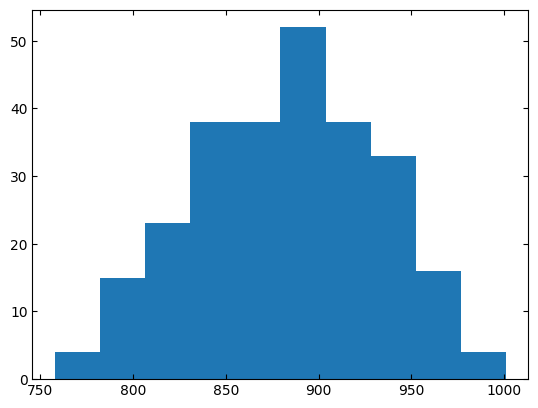

In [9]:
plt.hist(n_spiking_cells)


## Visualize the spiking activity using spike times



Now that we have the spike timing data, let's visualize them, and some of their properties, using two very common visualization libraries:

**Matplotlib**: The go-to library for creating static, interactive, and animated visualizations.
  - `import matplotlib.pyplot as plt`: import the `matplotlib.pyplot` library and give it an abbreviated name (i.e. `plt`)
  - `plt.scatter(x, y)`: Create a scatter plot of `x` vs `y`. `x` and `y` are both 1D arrays.
  - `plt.xlabel("your_text")`, `plt.ylabel("your_text")`: Label the x-axis and y-axis of the plot with specified text.
  - `plt.title("your_text")`: Add a title to the plot with the specified text.



**Example Exercise**

Create a scatter plot to visualize spikes for a single neuron across multiple trials.

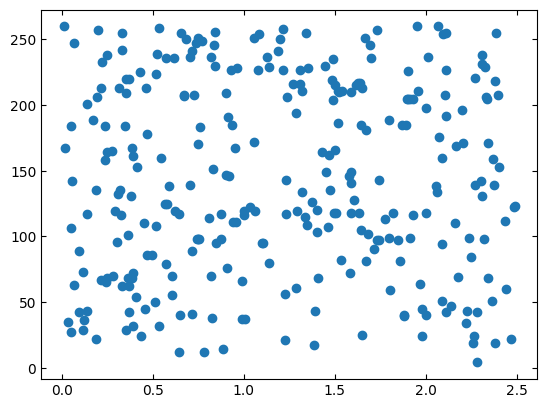

In [56]:
dd = df[df.spike_cell == 12]
plt.scatter(dd['spike_time'], dd['spike_trial'], );


**Exercises**


Create a scatter plot to visualize spikes for a neuron number 11 across multiple trials.

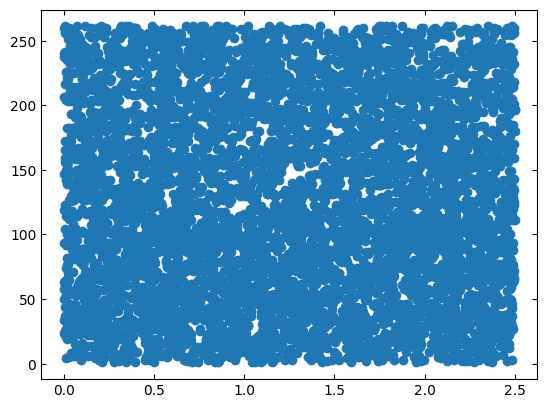

In [65]:
dd = df[df.spike_cell == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'] );

Wow, that plot looks crowded! Let's change the type of `marker` and experiment with the marker size, `s`.

Recreate the plot with a different `marker` and size, `s`. 

some `marker` options are:
* `"."` - point
* `","` - pixel
* `"*"` - star
* `"|"` - vertical line
* `"-"` - horizontal line

More are available are at the matplotlib website [here](https://matplotlib.org/stable/api/markers_api.html)

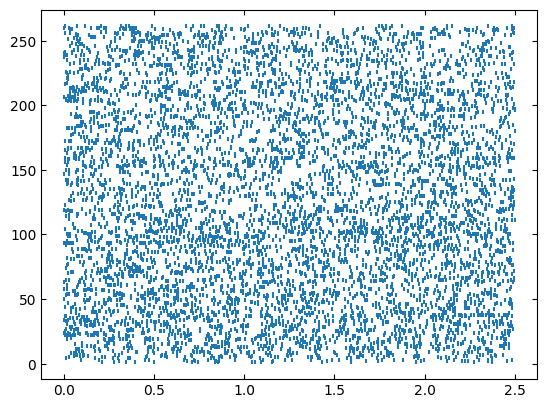

In [69]:
dd = df[df.spike_cell == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'],marker='|', s=5 );

By default, matplotlib does not provide axis labels. 

Remake your plot with axis labels


Text(0, 0.5, 'trial number')

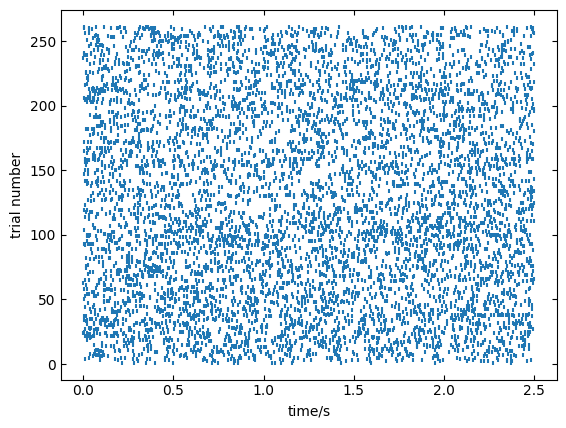

In [73]:
dd = df[df.spike_cell == 11]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|', s=5 );
plt.xlabel('time/s')
plt.ylabel('trial number')


Create a scatter plot to visualize spikes for all neurons in trial 83.

Text(0, 0.5, 'cell')

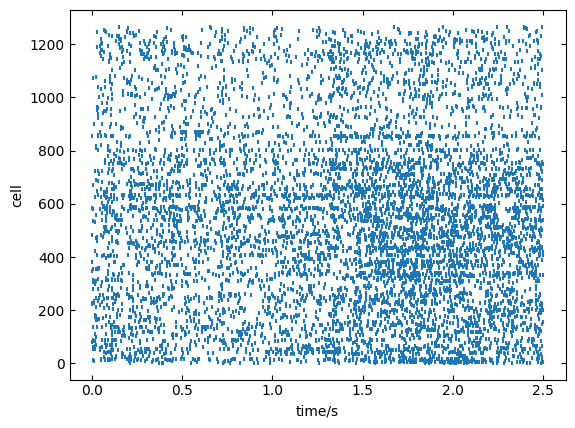

In [76]:
dd = df[df.spike_trial == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5 );
plt.xlabel('time/s')
plt.ylabel('cell')

We can vary the color of the points based of the spike time with the `c` argument of `plt.scatter`

Remake the above plot setting the color of the points to the spike time.

Text(0, 0.5, 'cell')

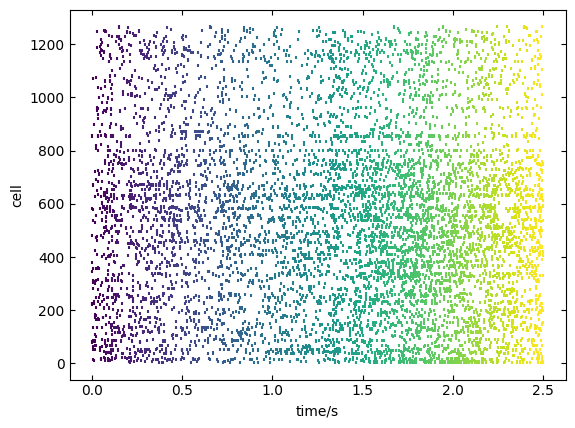

In [78]:
dd = df[df['spike_trial'] == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5, c=dd['spike_time'] );
plt.xlabel('time/s')
plt.ylabel('cell')

Remake the plot above, giving the plot an appropriate title 

Text(0.5, 1.0, 'Trial number 83')

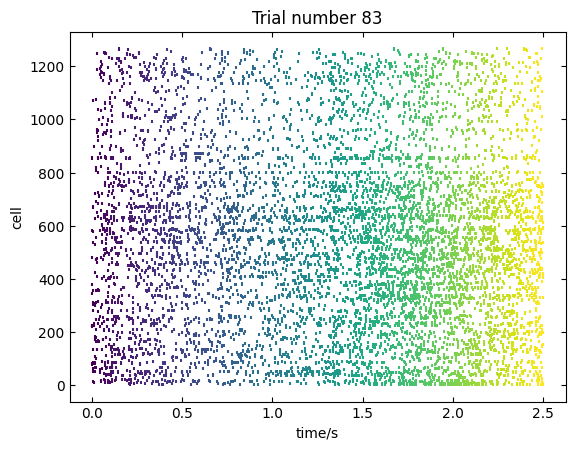

In [10]:
dd = df[df['spike_trial'] == 83]
plt.scatter(dd['spike_time'], dd['spike_cell'], marker='|', s=5, c=dd['spike_time'] );
plt.xlabel('time/s')
plt.ylabel('cell')
plt.title('Trial number 83')

---

## Relating spike timing to event-based variables

In this section, we will expand on the previous section and analyse spike time events joinly with other experimental events such as `response_time` or `feedback_time`.

- More **Pandas**
  - `pd.merge(df_1, df_2)`: Merge `df_1` and `df_2` DataFrames based on common columns.
  - `df.rename(columns={"old_column_name": "new_column_name"})`: Rename the "old_column_name" column to "new_column_name" in the DataFrame.
  - `df.sort_values(by="column_b")`: Sort the DataFrame based on the values in the "column_b" column in ascending order.
  - `df['column_a'].factorize()[0]`: Encode the "column_a" column as an enumerated type, replacing each unique value with an integer. `[0]` returns just the array of integers.
  - 

Create a DataFrame containing experimental events `response_time`, `feedback_time`, `gocue` and `active_trials`

In [27]:

cols = ["response_time", "feedback_time", "gocue", "active_trials"]
experimental_df = dataset[cols].to_dataframe().reset_index().rename(columns={"trial": "spike_trial"})
experimental_df



,spike_trial,response_time,feedback_time,gocue,active_trials
0,1,1.233257,1.271620,0.982816,True
1,2,1.066648,1.103617,0.902014,True
2,3,1.366633,1.402422,1.113618,True
3,4,1.016824,1.052817,0.688811,True
4,5,1.183435,1.193619,1.017616,True
...,...,...,...,...,...
256,257,NaN,NaN,NaN,False
257,258,NaN,NaN,NaN,False
258,259,NaN,NaN,NaN,False
259,260,NaN,NaN,NaN,False


**Example Exercise**



Merge the DataFrames `df` and `experimental_df` into one DataFrame

In [29]:
spike_time_df = pd.merge(df, experimental_df)
spike_time_df

,spike_id,spike_trial,spike_cell,spike_time,response_time,feedback_time,gocue,active_trials
0,1,1,1,2.362881,1.233257,1.27162,0.982816,True
1,2,1,1,2.384915,1.233257,1.27162,0.982816,True
2,168,1,2,0.575315,1.233257,1.27162,0.982816,True
3,169,1,2,0.637148,1.233257,1.27162,0.982816,True
4,170,1,2,1.113615,1.233257,1.27162,0.982816,True
...,...,...,...,...,...,...,...,...
1836004,1835388,261,1265,1.273147,NaN,NaN,NaN,False
1836005,1835888,261,1266,0.502348,NaN,NaN,NaN,False
1836006,1835889,261,1266,0.835414,NaN,NaN,NaN,False
1836007,1835890,261,1266,0.914280,NaN,NaN,NaN,False


**Exercises**

Create a merged dataframe of `df` and `experimental_df` but only where `active_trials` is `True`

Name the result `spike_time_df`

In [30]:
experimental_df_active = experimental_df[experimental_df['active_trials']==True]
spike_time_df = pd.merge(df, experimental_df_active )
spike_time_df

,spike_id,spike_trial,spike_cell,spike_time,response_time,feedback_time,gocue,active_trials
0,1,1,1,2.362881,1.233257,1.271620,0.982816,True
1,2,1,1,2.384915,1.233257,1.271620,0.982816,True
2,168,1,2,0.575315,1.233257,1.271620,0.982816,True
3,169,1,2,0.637148,1.233257,1.271620,0.982816,True
4,170,1,2,1.113615,1.233257,1.271620,0.982816,True
...,...,...,...,...,...,...,...,...
1048249,1833983,151,1263,0.867644,2.100698,2.111633,0.596409,True
1048250,1833984,151,1263,1.736843,2.100698,2.111633,0.596409,True
1048251,1833985,151,1263,2.100776,2.100698,2.111633,0.596409,True
1048252,1834971,151,1265,2.304676,2.100698,2.111633,0.596409,True


Make a scatter plot showing spike time events for a cell number 48 from `spike_time_df`

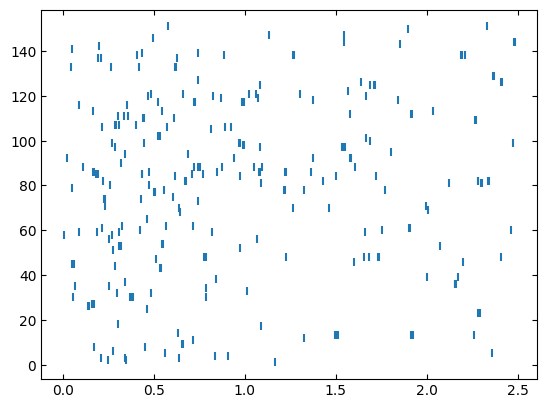

In [63]:
dd = spike_time_df[spike_time_df['spike_cell']==48]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|')

To the plot above add the response times as a scatter plot

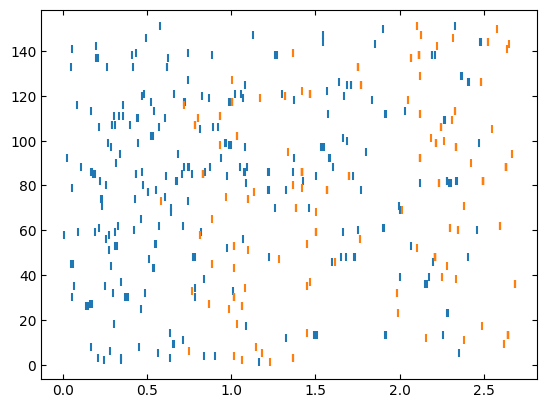

In [64]:
dd = spike_time_df[spike_time_df['spike_cell']==48]
plt.scatter(dd['spike_time'], dd['spike_trial'], marker='|')
plt.scatter(dd['response_time'], dd['spike_trial'], marker='|')

We can better assess the relation between the response event and neuron spiking by sorting the cells by response time.

First sort the spike data for cell 3 by response time. Call the result `spike_cell_48_df`

In [78]:
spike_cell_48_df = spike_time_df[spike_time_df['spike_cell']==48]
spike_cell_48_df = spike_cell_48_df.sort_values(by="response_time")

Now add a new column called `spike_trial_sorted` to `spike_cell_48_df` that is the `spike_trial` data reset to 0. **Hint** use `df.factorize()`

In [79]:
spike_cell_48_df ["spike_trial_sorted"] = spike_cell_48_df ['spike_trial'].factorize()[0]
spike_cell_48_df 

,spike_id,spike_trial,spike_cell,spike_time,response_time,feedback_time,gocue,active_trials,spike_trial_sorted
533775,99338,73,48,0.742227,0.585404,0.620010,0.500808,True,0
827442,99441,116,48,0.087679,0.718770,0.752412,0.623610,True,1
827443,99442,116,48,0.356179,0.718770,0.752412,0.623610,True,1
18407,99246,6,48,0.278203,0.750819,0.786012,0.618810,True,2
271641,99278,33,48,1.013364,0.767115,0.805213,0.672411,True,3
...,...,...,...,...,...,...,...,...,...
675969,99399,94,48,0.686661,2.667009,2.702443,1.155618,True,100
675968,99398,94,48,0.342161,2.667009,2.702443,1.155618,True,100
279120,99283,36,48,2.155156,2.683245,2.684843,1.171619,True,101
279121,99284,36,48,2.161123,2.683245,2.684843,1.171619,True,101


Make a scatter plot showing the spike and response times on the x axis and the `spike_trial_sorted` values on the y axis. This plot is known as a rasterplot.

Text(0, 0.5, 'trial id')

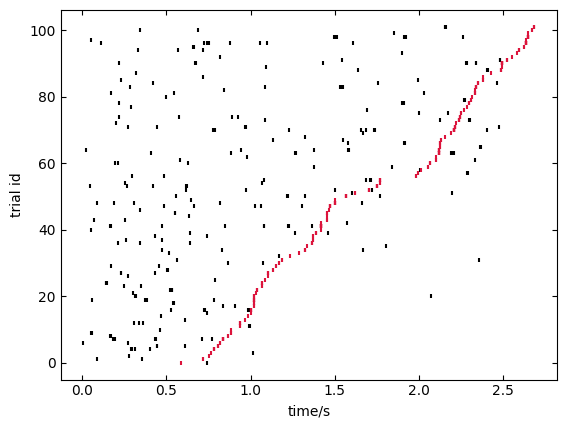

In [80]:

plt.scatter(spike_cell_48_df['spike_time'], spike_cell_48_df['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(spike_cell_48_df['response_time'], spike_cell_48_df['spike_trial_sorted'], marker="|", s=10, c="crimson");
plt.xlabel('time/s')


Cell 48 is clearly has a strong relationship to the subject's response. Can you think of why this may be? What brain region is cell 48 in?

**Hint** - use `dataset["brain_area"].to_dataframe().reset_index()`

In [77]:
dd=  dataset["brain_area"].to_dataframe().reset_index()
dd[dd['cell']==48]

,cell,brain_area
47,48,VISam


Make another rasterplot but for cell 187

Text(0.5, 0, 'time/s')

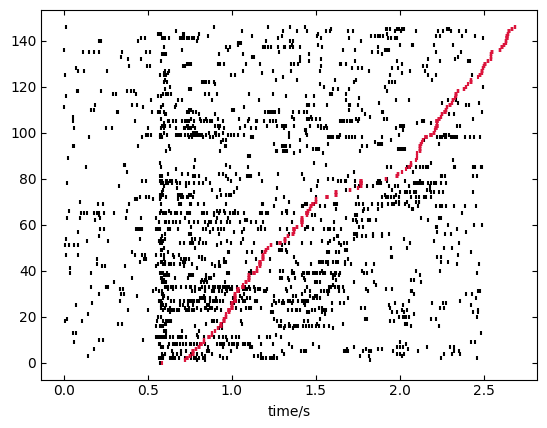

In [82]:
dd = spike_time_df[spike_time_df['spike_cell']==187]
dd = dd.sort_values(by="response_time")

dd["spike_trial_sorted"] = dd['spike_trial'].factorize()[0]

plt.scatter(dd['spike_time'], dd['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(dd['response_time'], dd['spike_trial_sorted'], marker="|", s=10, c="crimson");
plt.xlabel('time/s')


Text(0.5, 0, 'time/s')

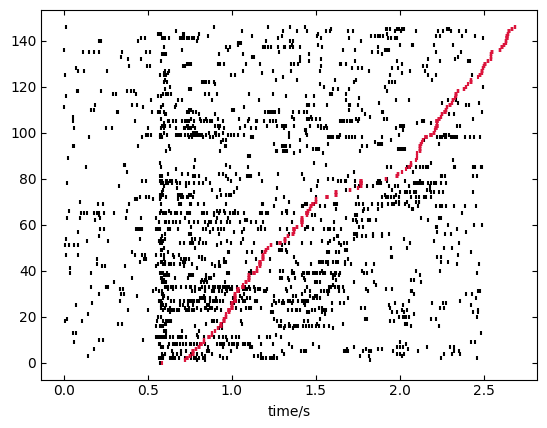

In [89]:
dd = spike_time_df[spike_time_df['spike_cell']==187]
dd = dd.sort_values(by="response_time")

dd["spike_trial_sorted"] = dd['spike_trial'].factorize()[0]

plt.scatter(dd['spike_time'], dd['spike_trial_sorted'], marker="|", s=10, c="k");
plt.scatter(dd['response_time'], dd['spike_trial_sorted'], marker="|", s=10, c="crimson");
#plt.scatter(dd['gocue'], dd['spike_trial_sorted'], marker="|", s=10, c="green");

plt.xlabel('time/s')

What do you notice about the above rasterplot? Do you think that anything special happens around 0.5s into each trial? **Hint** Look at the Attributes of the `dataset`

In [94]:
dataset

<xarray.Dataset>
Dimensions:             (trial: 261, time: 250, cell: 1268,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 256 257 258 259 260 261
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 50 0 100 0 50 0 0 ... 0 100 0 100 0 100 0
    contrast_right      (trial) int8 0 50 25 100 50 50 ... 50 100 50 100 25 25
    gocue               (trial) float64 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.272 1.104 1.402 1.053 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -27.6 ... 0.1221
    spike_time          (spike_id) float32 2.363 2.385 1.451 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1268 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 1 1 2 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

## Spiking activity in different brain areas

The dataset includes which brain areas each spiking cell is in. In this section we will use pandas and matplotlib to find the most active brain areas

Create a dataframe that contains the brain area for each cell.

In [119]:
brain_region_df = dataset["brain_area"].to_dataframe().reset_index().rename(columns={"cell": "spike_cell"})
brain_region_df

,spike_cell,brain_area
0,1,PO
1,2,PO
2,3,PO
3,4,VISam
4,5,PO
...,...,...
1263,1264,root
1264,1265,root
1265,1266,root
1266,1267,root


Create a DataFrame with information about spikes and brain areas

In [120]:
spike_region_df = pd.merge(df, brain_region_df)
spike_region_df

,spike_id,spike_trial,spike_cell,spike_time,brain_area
0,1,1,1,2.362881,PO
1,2,1,1,2.384915,PO
2,3,2,1,1.450718,PO
3,4,2,1,1.459585,PO
4,5,2,1,1.963452,PO
...,...,...,...,...,...
1836004,1836005,205,1268,2.240762,root
1836005,1836006,205,1268,2.268195,root
1836006,1836007,205,1268,2.401162,root
1836007,1836008,213,1268,1.650607,root


**Example Exercise**


What brain areas were recorded from this specific mouse?

In [16]:
spike_region_df.brain_area.unique()

array(['PO', 'VISam', 'LP', 'DG', 'CA1', 'root'], dtype=object)

**Exercises**

How many spikes occur in  each brain area?

In [22]:
spike_region_df['brain_area'].value_counts()

brain_area
root     572279
PO       445466
VISam    313577
LP       301621
DG       124526
CA1       78540
Name: count, dtype: int64

We will take the spikes for trial 187 and produce an ordered index for brain area

**Example Exercise**

In [121]:
dd = spike_region_df[spike_region_df["spike_trial"] == 187]
dd = dd.sort_values(by="brain_area")
dd["ordered_index"] = dd.spike_cell.factorize()[0]
dd

,spike_id,spike_trial,spike_cell,spike_time,brain_area,ordered_index
818501,818502,187,470,1.757417,CA1,0
273926,273927,187,145,0.079684,CA1,1
810864,810865,187,465,2.353217,CA1,2
810863,810864,187,465,2.342650,CA1,2
810862,810863,187,465,1.872784,CA1,2
...,...,...,...,...,...,...
1471034,1471035,187,868,1.581396,root,922
1472233,1472234,187,869,0.688164,root,920
1472234,1472235,187,869,1.073696,root,920
1426025,1426026,187,828,0.170764,root,824


Let's make a rasterplot for one brain area showing the `spike_time` on the x axis and `ordered_index` on the y axis

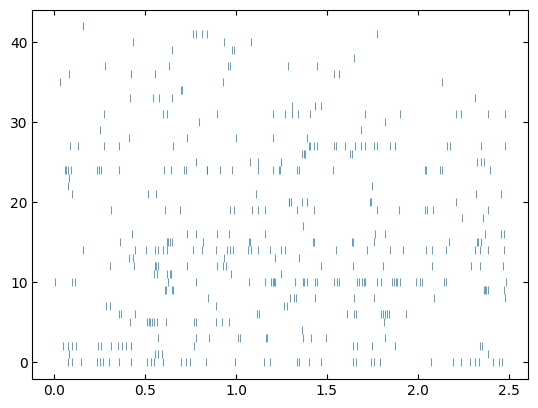

In [136]:
area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area['spike_time'], dd_area['ordered_index'],  marker='|', linewidths=0.5, label=area)

Which brain areas are in `dd`?

In [135]:
dd['brain_area'].unique()

array(['CA1', 'DG', 'LP', 'PO', 'VISam', 'root'], dtype=object)

For each brain area make a rasterplot on the same figure 

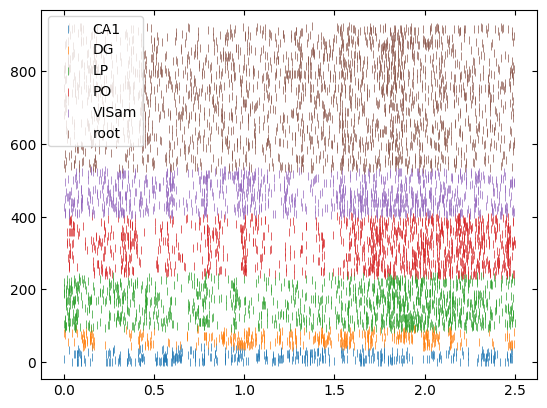

In [137]:
area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index,  marker='|', linewidths=0.5, label=area)

area = "DG"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "LP"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index , marker='|', linewidths=0.5, label=area)

area = "PO"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "VISam"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "root"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

plt.legend()

Let's make the same plot in seaborn

<Axes: xlabel='spike_time', ylabel='ordered_index'>

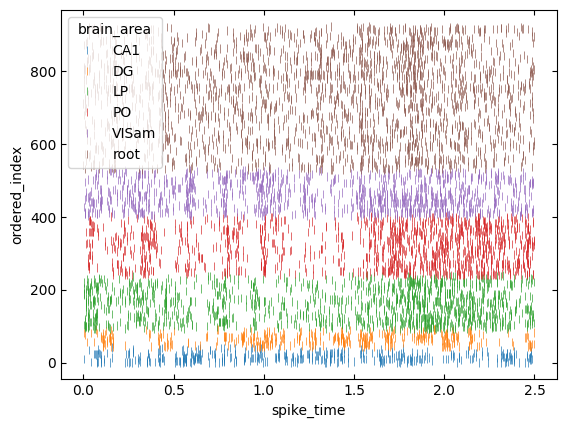

In [126]:
import seaborn as sns
sns.scatterplot(x=dd.spike_time, y=dd.ordered_index, marker="|", hue=dd.brain_area)
